# Regularización L1 y L2

### Importaciones

In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.regularizers import l1, l2


import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


### Lectura de la información

#### Montar Google Drive

In [ ]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


#### Lectura de los datos

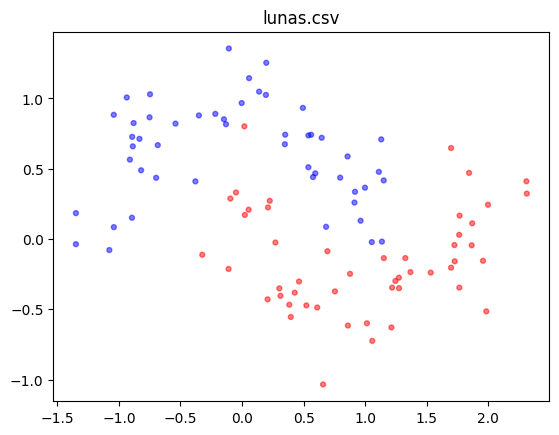

In [ ]:
X = np.loadtxt(DIRECTORIO + 'lunas.csv', delimiter=',')
colores=['blue', 'red']
cmap = matplotlib.colors.ListedColormap(colores)
plt.figure()
plt.title('lunas.csv')
plt.scatter(X[:,0], X[:,1], c=X[:,2], marker= '.', s=50, cmap=cmap, alpha = 0.5);

### Preparación de los datos

In [ ]:
y = X[:,2].astype(int) # copia la última columna en un array como entero
X = np.delete(X,2,1)   # 2-> índice columna a eliminar, axis=1: columnas

# genera conjuntos entrenamiento y validación
n_entr = 30
entrX, valX = X[:n_entr, :], X[n_entr:, :]
entry, valy = y[:n_entr],    y[n_entr:]

### Creación y compilación del modelo

In [ ]:
def creaModelo(regularizacion):
  modelo = Sequential()
  modelo.add(Input(shape=(2,)))
  if regularizacion == 0:  # SIN REGULARIZACIÓN
    modelo.add(Dense(500, activation='relu'))
  elif regularizacion == 1: # CON REGULARIZACIÓN L1
    modelo.add(Dense(500, activation='relu', kernel_regularizer=l1(0.001)))
  else: # CON REGULARIZACIÓN L2
    modelo.add(Dense(500, activation='relu', kernel_regularizer=l2(0.001)))

  # para aplicar ambas (elastic net): kernel_regularizer = l1_l2(l1=1e-5, l2=1e-4)

  # CAPA FINAL (SALIDA)
  modelo.add(Dense(1, activation='sigmoid'))

  # compilación:
  modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return modelo

### Bucle principal con gráficas

SIN REGULARIZACIÓN -> Entrenamiento: 1.000, Validación: 0.929
REGULARIZACIÓN L1  -> Entrenamiento: 1.000, Validación: 0.929
REGULARIZACIÓN L2  -> Entrenamiento: 1.000, Validación: 0.943




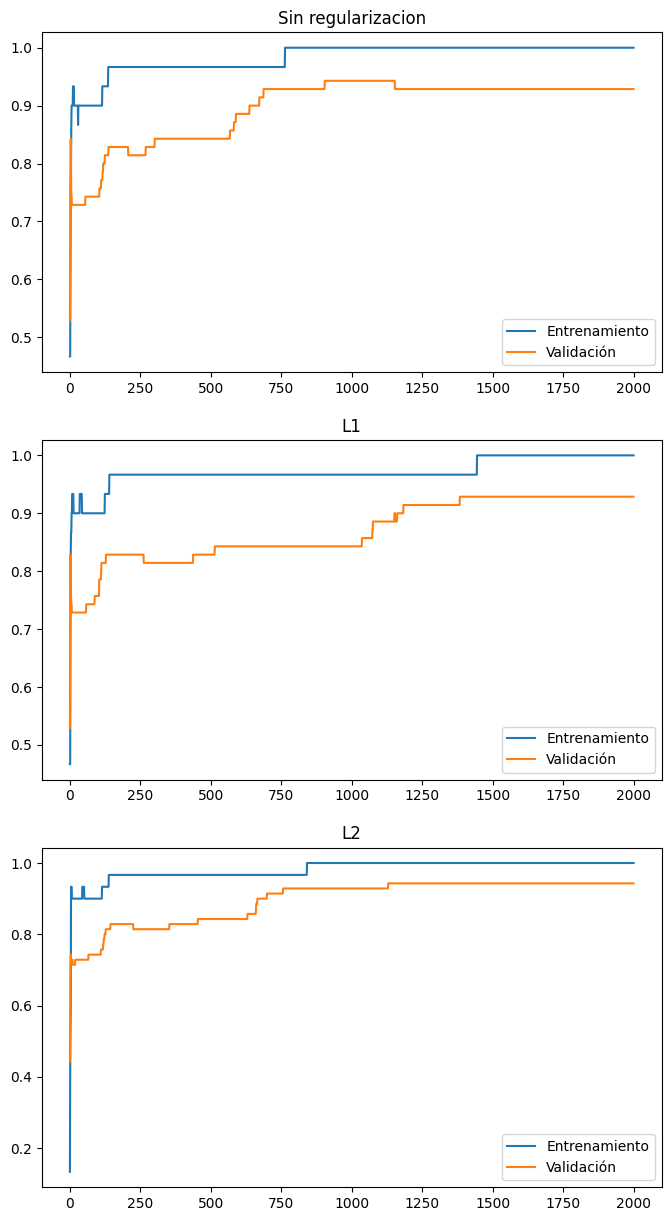

In [ ]:
# preparación de las gráficas:
plt.figure(figsize=(8,15))

for regularizacion in range(3):
  plot_num = 310 + regularizacion + 1  # determina el número de gráfica
  plt.subplot(plot_num)

  # crea y compila modelo
  modelo  = creaModelo(regularizacion)

  # entrenamiento
  historial = modelo.fit(entrX, entry, validation_data=(valX, valy), epochs=2000, verbose=0)

  # mostramos evolución de la exactitud (accuracy)
  plt.plot(historial.history['accuracy'], label='Entrenamiento')
  plt.plot(historial.history['val_accuracy'], label='Validación')

  # gráficas de exactitud (accuracy)
  if regularizacion == 0:  # SIN REGULARIZACIÓN
    plt.title('Sin regularizacion')
  elif (regularizacion == 1): # CON REGULARIZACIÓN L1
    plt.title('L1')
  else: # CON REGULARIZACIÓN L2
    plt.title('L2')

  plt.legend(['Entrenamiento', 'Validación'], loc='best')

  # evaluación numérica
  _, exac_entr = modelo.evaluate(entrX, entry, verbose=0)
  _, exac_val  = modelo.evaluate(valX, valy, verbose=0)

  if regularizacion == 0:     # SIN REGULARIZACIÓN
    tipoReg = "SIN REGULARIZACIÓN -> "
  elif (regularizacion == 1): # CON REGULARIZACIÓN L1
    tipoReg = "REGULARIZACIÓN L1  -> "
  else:                       # CON REGULARIZACIÓN L2
    tipoReg = "REGULARIZACIÓN L2  -> "

  print(tipoReg + 'Entrenamiento: %.3f, Validación: %.3f' % (exac_entr, exac_val))
  if regularizacion == 2:
    print("\n")